********************************************************************************************************************************
Artificial Intelligence II 
Natural Language processing

SPAM/HAM Email Classification

Author : Myia Boyle <br>
Date : April 2023 
********************************************************************************************************************************
Data Reference : https://www.kaggle.com/datasets/yashpaloswal/spamham-email-classification-nlp
********************************************************************************************************************************

### Importing Data

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
emailsDF = pd.read_csv('emails.csv')

In [3]:
emailsDF.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
print(emailsDF)

                                                   Text  Spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]


### Converting to lowercase, Removing Punctuations and Special Charcters 

In [5]:
###www.kaggle.com
emailsDF['Text'] = emailsDF['Text'].str.lower()
emailsDF['Text'] = emailsDF['Text'].str.replace(r'[^\w\s]+', '')
emailsDF['Text'] = emailsDF['Text'].str.replace('\W', '', regex=True)

print(emailsDF)

<ipython-input-5-abb9b564dd85>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  emailsDF['Text'] = emailsDF['Text'].str.replace(r'[^\w\s]+', '')


                                                   Text  Spam
0     subjectnaturallyirresistibleyourcorporateident...     1
1     subjectthestocktradinggunslingerfannyismerrill...     1
2     subjectunbelievablenewhomesmadeeasyimwantingto...     1
3     subject4colorprintingspecialrequestadditionali...     1
4     subjectdonothavemoneygetsoftwarecdsfromheresof...     1
...                                                 ...   ...
5723  subjectreresearchanddevelopmentchargestogpgher...     0
5724  subjectrereceiptsfromvisitjimthanksagainforthe...     0
5725  subjectreenroncasestudyupdatewowallonthesameda...     0
5726  subjectreinterestdavidpleasecallshirleycrensha...     0
5727  subjectnewsaurora52updateauroraversion52thefas...     0

[5728 rows x 2 columns]


### Stopwords

In [6]:
import nltk

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myiab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myiab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords 

In [10]:
stop_words =set(stopwords.words('english'))

In [11]:
emailsDF['Text']= emailsDF['Text'].apply(lambda x:' '.join([item for item in x.split() if item not in stop_words ]))

In [12]:
print(emailsDF)

                                                   Text  Spam
0     subjectnaturallyirresistibleyourcorporateident...     1
1     subjectthestocktradinggunslingerfannyismerrill...     1
2     subjectunbelievablenewhomesmadeeasyimwantingto...     1
3     subject4colorprintingspecialrequestadditionali...     1
4     subjectdonothavemoneygetsoftwarecdsfromheresof...     1
...                                                 ...   ...
5723  subjectreresearchanddevelopmentchargestogpgher...     0
5724  subjectrereceiptsfromvisitjimthanksagainforthe...     0
5725  subjectreenroncasestudyupdatewowallonthesameda...     0
5726  subjectreinterestdavidpleasecallshirleycrensha...     0
5727  subjectnewsaurora52updateauroraversion52thefas...     0

[5728 rows x 2 columns]


### Tokenization of words 


In [13]:
## Kaggle.com
nltk.word_tokenize(emailsDF['Text'][0])

['subjectnaturallyirresistibleyourcorporateidentityltisreallyhardtorecollectacompanythemarketisfullofsuqgestionsandtheinformationisoverwhelminqbutagoodcatchylogostylishstatloneryandoutstandingwebsitewillmakethetaskmucheasierwedonotpromisethathavinqorderedaiogoyourcompanywillautomaticailybecomeaworldieaderitisguiteciearthatwithoutgoodproductseffectivebusinessorganizationandpracticableaimitwillbehotatnowadaysmarketbutwedopromisethatyourmarketingeffortswillbecomemuchmoreeffectivehereisthelistofclearbenefitscreativenesshandmadeoriginallogosspeciallydonetoreflectyourdistinctivecompanyimageconveniencelogoandstationeryareprovidedinallformatseasytousecontentmanagementsystemletsyouchangeyourwebsitecontentandevenitsstructurepromptnessyouwillseelogodraftswithinthreebusinessdaysaffordabilityyourmarketingbreakthroughshouldntmakegapsinyourbudget100satisfactionguaranteedweprovideunlimitedamountofchangeswithnoextrafeesforyoutobesurethatyouwilllovetheresultofthiscollaborationhavealookatourportfolio____

### Stemming

In [37]:
##www.Kaggle.com
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word)for word in text ])

In [15]:
emailsDF['Text'] = emailsDF['Text'].apply(stemming)
emailsDF.head()

,Text,Spam
0,subjectnaturallyirresistibleyourcorporateident...,1
1,subjectthestocktradinggunslingerfannyismerrill...,1
2,subjectunbelievablenewhomesmadeeasyimwantingto...,1
3,subject4colorprintingspecialrequestadditionali...,1
4,subjectdonothavemoneygetsoftwarecdsfromheresof...,1


### Converting to Machine Learnable form

##### Bag Of Words Model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
message_bow = vectorizer.fit_transform(emailsDF['Text'])

In [17]:
message_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

##### TF-IDF

In [18]:
##datasciencelearner.com
import sklearn

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
v = TfidfVectorizer()
x = v.fit_transform(emailsDF['Text'])
print(x.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Splitting the Data

In [21]:
## Kaggle.com
import sklearn

In [22]:
from sklearn.model_selection import train_test_split
XtrainDF,XtestDF,YtrainDF,YtestDF = train_test_split(message_bow,emailsDF['Spam'],test_size=0.30)

In [23]:
XtrainDF.shape

(4009, 5504)

In [24]:
XtestDF.shape

(1719, 5504)

### Machine Learning Models and Accuracy

##### NaiveBayesMultinomial Classifier

In [25]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(XtrainDF,YtrainDF)


MultinomialNB()

In [26]:
Ypred = nb.predict(XtestDF)

In [27]:
###www.kaggle.com
from sklearn.metrics import classification_report
print(classification_report(YtestDF,Ypred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1318
           1       0.00      0.00      0.00       401

    accuracy                           0.77      1719
   macro avg       0.38      0.50      0.43      1719
weighted avg       0.59      0.77      0.67      1719



C:\Users\myiab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myiab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myiab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


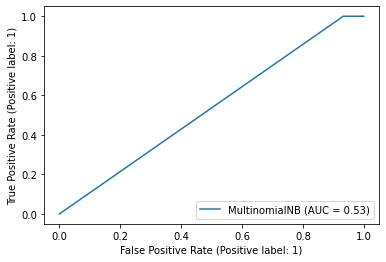

In [28]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(nb,XtestDF,YtestDF)

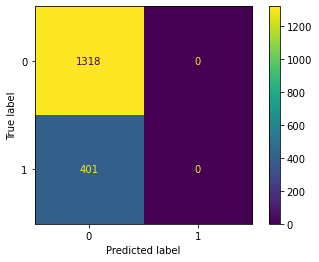

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,XtestDF,YtestDF)

In [30]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("NBG Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,emailsDF['Spam'],cv=kfold,scoring="accuracy"))*100," %")

NBG Accuracy using Cross Validation is : 76.11757622868988  %


##### SVM Classifier 

In [31]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(XtrainDF, YtrainDF)

SVC()

In [32]:
Ypred = svm.predict(XtestDF)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(YtestDF,Ypred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1318
           1       0.00      0.00      0.00       401

    accuracy                           0.77      1719
   macro avg       0.38      0.50      0.43      1719
weighted avg       0.59      0.77      0.67      1719



C:\Users\myiab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myiab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myiab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


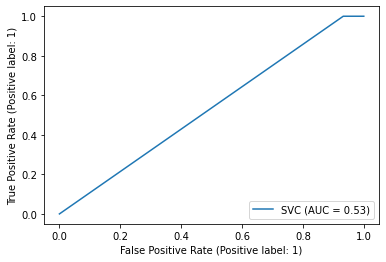

In [34]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm,XtestDF,YtestDF)

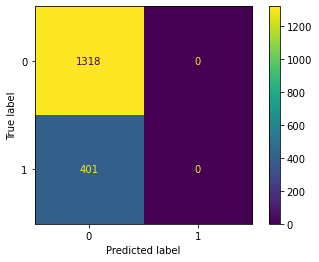

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm,XtestDF,YtestDF)

In [36]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("SVM Accuracy using Cross Validation is :",np.mean(cross_val_score(svm,message_bow,emailsDF['Spam'],cv=kfold,scoring="accuracy"))*100," %")

SVM Accuracy using Cross Validation is : 76.15249548457899  %
